# Objective

Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.

The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations.

# Tasks

# Import and read the data

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

In [248]:
df=pd.read_csv("E:\Python Assignment 1_BI\Data.csv")

In [249]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10838     NaN       3   9500.000000       1,000+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[10841 rows x 13 columns]

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [251]:
np.shape(df)

(10841, 13)

# Tasks

# 1. Data clean up - Missing value treatment.

# (a). Drop records where rating is missing since rating is our target/study variable.

In [252]:
df["Rating"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [253]:
b=df["Rating"].dropna(axis="rows",how="any")
b

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9367, dtype: float64

In [254]:
df["Rating"].isna().sum()

1474

In [255]:
c=df.dropna(axis="rows",subset=["Rating"])

In [256]:
c

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9367 rows x 13 columns]

In [257]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# (b). Check the null values for the Android Ver column. 

In [258]:
c["Android Ver"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Name: Android Ver, Length: 9367, dtype: bool

In [259]:
c[c["Android Ver"].isna()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [260]:
c["Android Ver"].isna().sum()

3

# (i). Are all 3 records having the same problem?
Ans : Yes, they all have NaN values in 'Android Ver' column of the dataset.

In [261]:
d=c[c["Android Ver"].isnull()]
d

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

#  (ii). Drop the 3rd record i.e. record for “Life Made WIFI …”.

In [262]:
p=c.drop([10472])
p

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

# (iii). Replace remaining missing values with the mode.

In [263]:
p["Android Ver"].mode()

0    4.1 and up
dtype: object

In [264]:
p["Android Ver"]=p["Android Ver"].fillna('4.1 and up')

In [265]:
p[p["Android Ver"].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [266]:
p

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

#  (c). Current ver – replace with most common value

In [267]:
p["Current Ver"].mode()

0    Varies with device
dtype: object

In [268]:
p["Current Ver"]=p["Current Ver"].fillna('Varies with device')

In [269]:
p[p["Current Ver"].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

# 2. Data clean up : correcting the data types.

In [270]:
p

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

# (a). Which all variables need to be brought to numeric types?

In [271]:
p["Size"]

0        19000.000000
1        14000.000000
2         8700.000000
3        25000.000000
4         2800.000000
             ...     
10834     2600.000000
10836    53000.000000
10837     3600.000000
10839    21516.529524
10840    19000.000000
Name: Size, Length: 9366, dtype: float64

In [272]:
p["Size"] = p["Size"].astype(int)
p["Size"]

0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10834     2600
10836    53000
10837     3600
10839    21516
10840    19000
Name: Size, Length: 9366, dtype: int32

In [273]:
p["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: object

In [274]:
p['Reviews'] = p['Reviews'].astype(int)
p["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int32

# (b). Price variable : remove 'dollar' sign and convert to float.

In [275]:
p

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size     Installs  Type Price Content Rating  \
0         4.1      159  19000      10,000+  Free     0       Everyone   
1         3.9      967  14000     500,000+  Free     0       Everyone   
2         4.7    87510   8700   5,000,000+  Free     0       Everyone   
3         4.5   215644  25000  50,000,000+  Free     0           Teen   
4         4.3      967   2800     100,000+  Free     0       Everyone   
...       ...      ...    ...          ...   ...   ...            ...   
10834     4.0        7   2600         500+  Free     0       Everyone   
10836     4.5       38  53000       5,000+  Free     0       Everyone   
10837     5.0        4   3600         100+  Free     0       Everyone   
10839     4.5      114  21516       1,000+  Free     0     Mature 17+   
10840     4.5   398307  19000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

In [276]:
p.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [277]:
p.Price = p.Price.str.replace("$","",regex=True).astype(float)

In [278]:
p.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

# (c). Installs : remove ',' and '+' sign, convert to integer.

In [279]:
p.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [280]:
p.Installs=p.Installs.str.replace(",","",regex=True).str.replace("+","",regex=True).astype(int)
p.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

# (d). Convert all other identified columns to numeric.

In [281]:
p["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9366, dtype: object

In [282]:
p['Last Updated'] = p['Last Updated'].astype('datetime64[ns]')
p["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9366, dtype: datetime64[ns]

In [283]:
p

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

In [284]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 914.6+ KB


# 3. Sanity checks : check for the following and handle accordingly.

# (a). Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

# (i). Are there any such records? Drop if so.

In [285]:
p.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

No, such records are there where 'Rating' is less than 1 or more than 5. All records are in between 1 and 5, so nothing to drop here.

# (b). Reviews should not be more than installs as only those who installed can review the app.

# (i). Are there any such records? Drop if so.

In [286]:
q = pd.DataFrame()
q = p[p.Reviews <= p.Installs]
q

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9359 rows x 13 columns]

In [287]:
q.shape

(9359, 13)

As per the given criteria, 9359 rows of data have been found where the number of reviews are not more than the number of installs.

# 4. Identify and handle outliers :

# (a). Price column :

# (i). Make suitable plot to identify outliers in price.

<AxesSubplot:xlabel='Price', ylabel='Type'>

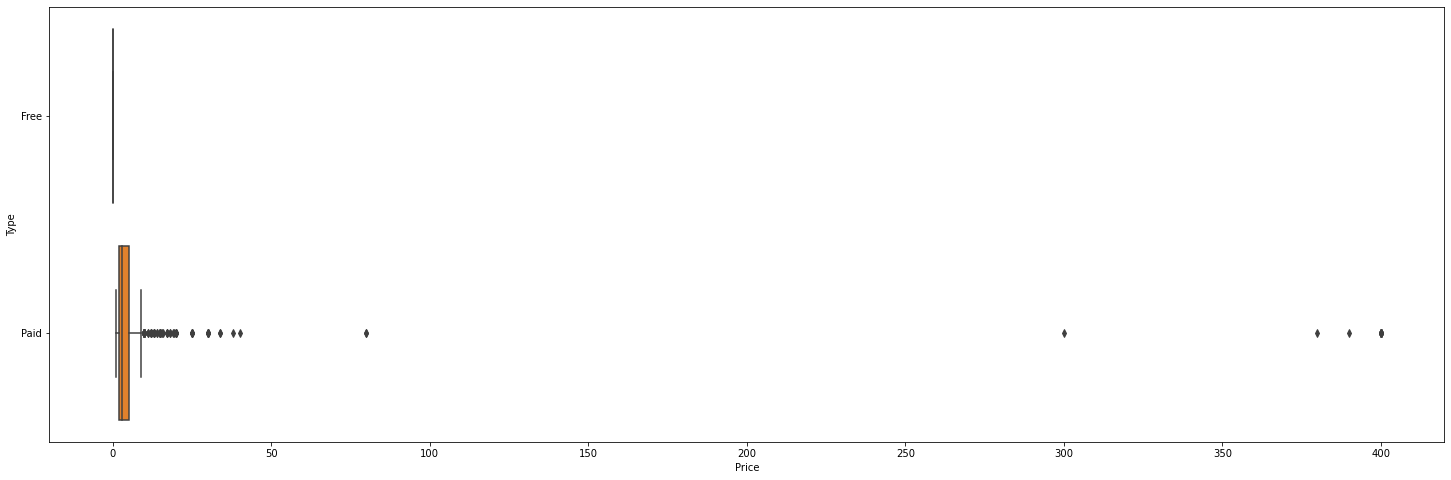

In [288]:
plt.figure(figsize=(25,8))
sns.boxplot(x="Price",y="Type",data=q)

Here, the box-plot has been plotted for 'Price' against the 'Type', i.e 'Free' or 'Paid'. The outliers can easily be identified from the above. 

# (ii). Do you expect apps on the play store to cost 200 dollars? Check out these cases.

In [289]:
q[q["Price"]>=200]

App   Category  Rating  Reviews   Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300   
5351                       I am rich  LIFESTYLE     3.8     3547   1800   
5354                  I am Rich Plus     FAMILY     4.0      856   8700   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900   
5358                      I am Rich!    FINANCE     3.8       93  22000   
5359              I am rich(premium)    FINANCE     3.5      472    965   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700   
5366                       I Am Rich     FAMILY     3.6      217   4900   
5369                       I am Rich    FINANCE     4.3      180   3800   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000   

      Installs  Type   Price Content Rating         Genres Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment   2018-07-16   
4362     10000  Paid  399.99       Everyone      Lifestyle   2018-03-11   
4367     10000  Paid  400.00       Everyone      Lifestyle   2018-05-03   
5351    100000  Paid  399.99       Everyone      Lifestyle   2018-01-12   
5354     10000  Paid  399.99       Everyone  Entertainment   2018-05-19   
5355     10000  Paid  299.99       Everyone      Lifestyle   2018-07-21   
5356     50000  Paid  399.99       Everyone        Finance   2017-11-12   
5357      1000  Paid  379.99       Everyone      Lifestyle   2018-07-01   
5358      1000  Paid  399.99       Everyone        Finance   2017-12-11   
5359      5000  Paid  399.99       Everyone        Finance   2017-05-01   
5362      5000  Paid  399.99       Everyone  Entertainment   2017-05-30   
5364      1000  Paid  399.99           Teen        Finance   2017-12-06   
5366     10000  Paid  389.99       Everyone  Entertainment   2018-06-22   
5369      5000  Paid  399.99       Everyone        Finance   2018-03-22   
5373      1000  Paid  399.99       Everyone        Finance   2018-06-25   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

No, apps on the play store should not be expected to cost more than $200 and here are those apps displayed above.

# (iii). After dropping the useless records, make the suitable plot again to identify outliers.

In [290]:
r=q.drop(q[q["Price"]>=200].index,inplace=False)
r

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9344 rows x 13 columns]

<AxesSubplot:xlabel='Price', ylabel='Type'>

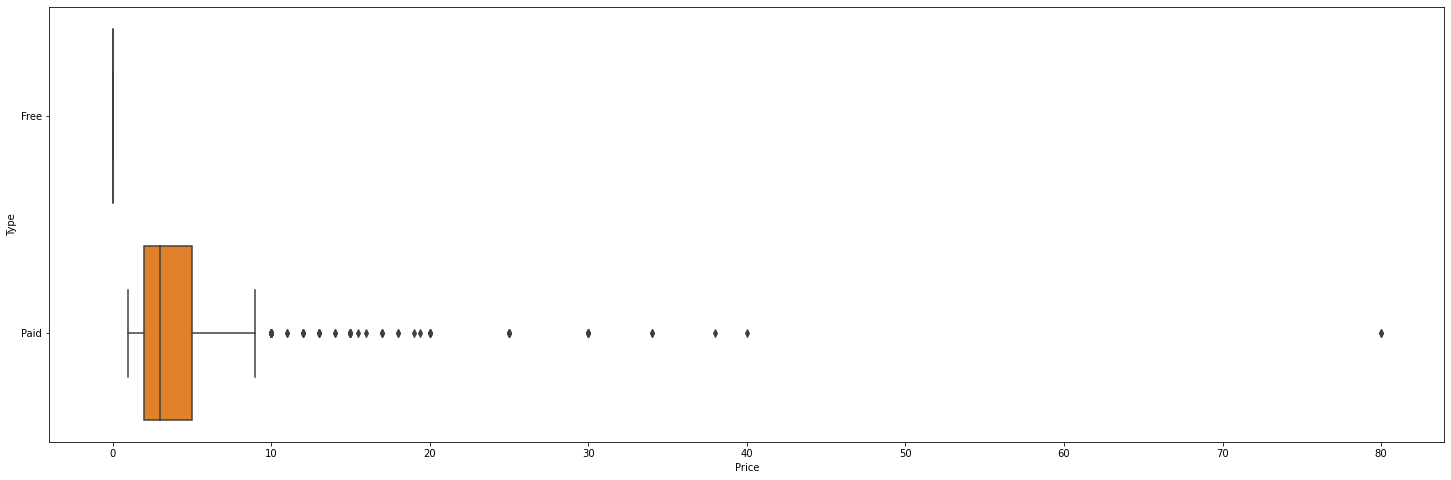

In [291]:
plt.figure(figsize=[25,8])
sns.boxplot(x="Price",y="Type",data=r)

Again, even after dropping some useless records, still the outliers can be identified.

# (iv). Limit data to records with price < 30 dollars.

In [292]:
r.drop(r[r["Price"]>30].index,inplace=True)
r

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9338 rows x 13 columns]

# (b). Reviews column :

# (i). Make suitable plot.

<AxesSubplot:xlabel='Reviews', ylabel='count'>

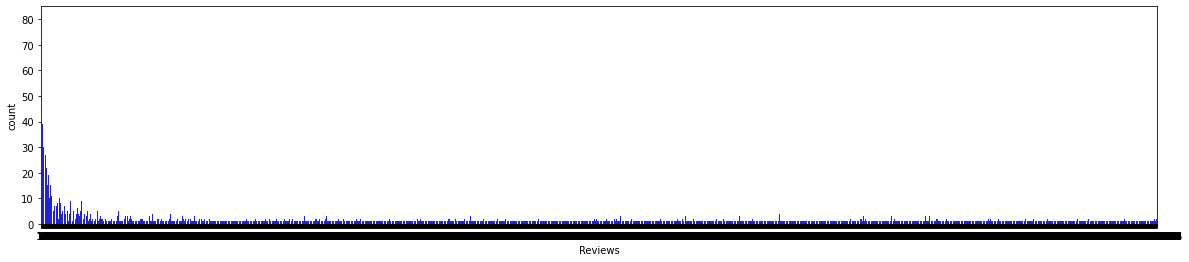

In [293]:
plt.figure(figsize=[20,4])
sns.countplot(x="Reviews",data=r,color="Blue")

# (ii). Limit data to apps with < 1 Million reviews.

In [294]:
r.drop(r[r["Reviews"]>1000000].index,inplace=True)
r

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
3                   Art & Design   2018-06-08  Varies with device   
4        Art & Design;Creativity   2018-06-20                 1.1   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8634 rows x 13 columns]

# (c). Installs :

# (i). What is the 95th percentile of the installs?

In [295]:
np.percentile(r["Installs"],95)

10000000.0

# (ii). Drop records having a value more than the 95th percentile.

In [296]:
r.drop(r[r["Installs"]>(np.percentile(r["Installs"],95))].index,inplace=True)
r[r["Installs"]>10000000]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [297]:
r

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
4        Art & Design;Creativity   2018-06-20                 1.1   
5                   Art & Design   2017-03-26                 1.0   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8435 rows x 13 columns]

# Data analysis to answer business questions.

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

<AxesSubplot:xlabel='Rating', ylabel='count'>

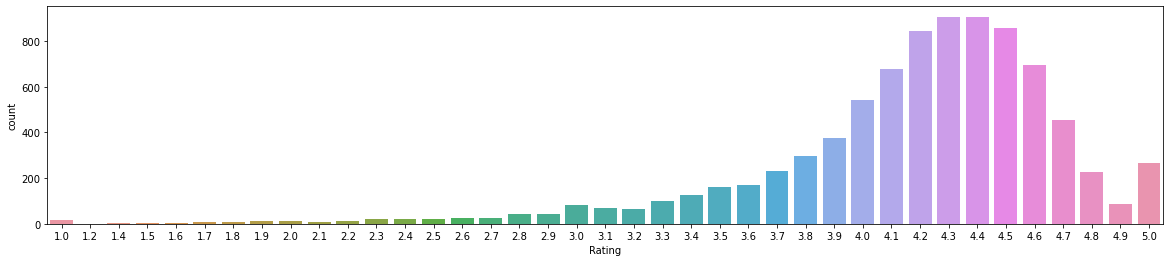

In [298]:
plt.figure(figsize=[20,4])
sns.countplot(x="Rating",data=r)

If you see, the above plot looks more like a skewed curve, i.e. skewed towards the higher values.

# (a). How do you explain this?

The 'countplot' has been plotted for 'Rating' column of the dataset and it was found that most of the apps in count are of higher 'Rating'. 

# (b). What is the implication of this on your analysis?

We have got most number of apps in play store that are of higher 'Rating', so we can leave behind the apps that are of lower 'Rating' as they are lesser in count. For further data cleaning process and making dataset to be more precise, those values can be dropped that are lesser in count of 'Rating' in play store.

# 6. What are the top Content Rating values?

In [299]:
r["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [300]:
r.groupby(["Content Rating"]).agg({"Rating":sum})

Rating
Content Rating          
Adults only 18+     12.9
Everyone         28275.8
Everyone 10+      1400.6
Mature 17+        1709.6
Teen              3777.7
Unrated              4.1

As it can be easily identified, from 'Content Rating' column, 'Everyone', 'Everyone 10+', 'Mature 17+' and 'Teen', these are the few 'Content Rating' categories that have top 'Content Rating' values.

# (a). Are there any values with very few records?

Yes, there are some values like 'Adults only 18+' and 'Unrated' that have very few records in 'Content Rating' column of the dataset. 

# (b). If yes, drop those as they won’t help in the analysis.

In [301]:
r.drop(r[r["Content Rating"]=="Adults only 18+"].index,inplace=True)
r.drop(r[r["Content Rating"]=="Unrated"].index,inplace=True)
r

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres Last Updated         Current Ver  \
0                   Art & Design   2018-01-07               1.0.0   
1      Art & Design;Pretend Play   2018-01-15               2.0.0   
2                   Art & Design   2018-08-01               1.2.4   
4        Art & Design;Creativity   2018-06-20                 1.1   
5                   Art & Design   2017-03-26                 1.0   
...                          ...          ...                 ...   
10834                  Education   2017-06-18               1.0.0   
10836                  Education   2017-07-25                1.48   
10837                  Education   2018-07-06                 1.0   
10839          Books & Reference   2015-01-19  Varies with device   
10840                  Lifestyle   2018-07-25  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# 7. Effect of size on rating :

# (a). Make a joinplot to understand the effect of size on rating.

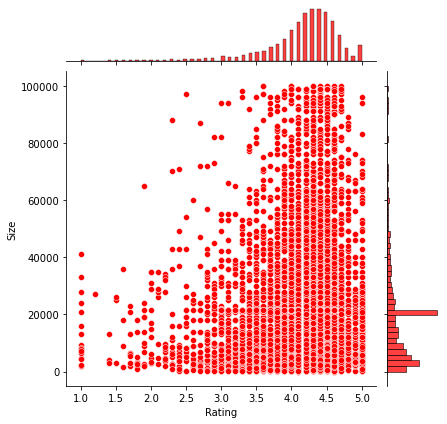

In [302]:
sns.jointplot (x="Rating", y="Size", data=r, kind='scatter', color="Red", height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None)

# (b). Do you see any patterns?

Yes, there are patterns that can be considered to be analysed.

# (c). How do you explain the pattern?

From the above plot of 'Rating' vs. 'Size', it can be concluded that the apps in play store with top 'Rating' are of smaller 'Size'. So, it's good to have this kind of patterns as top rated apps in play store are being available with lower size.  

# 8. Effect of price on rating :

# (a). Make a jointplot (with regression line).

<AxesSubplot:xlabel='Rating', ylabel='Price'>

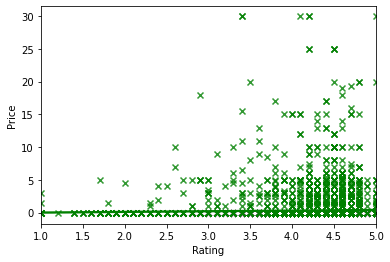

In [303]:
sns.regplot(x="Rating", y="Price", data=r, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True,dropna=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, label=None, color="Green", marker='x', scatter_kws=None, line_kws=None, ax=None)

# (b). What pattern do you see?
# (c). How do you explain the pattern?

The 'Rating' vs. 'Price' with 'regression line' joint plot has been plotted above and from there a pattern can be identified as the 'regression line' is being there below at 0 level of 'Price' column. In addition to that the plot is more dense towards the lower right corner that means most of the top rated apps in play store have lower price.

# (d). Replot the data, this time with only records with price > 0.

In [304]:
s=r[r["Price"]>0]
s

App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
290    TurboScan: scan documents and receipts in PDF            BUSINESS   
291                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
...                                              ...                 ...   
10682                            Fruit Ninja Classic                GAME   
10690                                       FO Bixby     PERSONALIZATION   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
234       4.7    11442   6800    100000  Paid   4.99       Everyone   
235       4.8    10295  39000    100000  Paid   4.99       Everyone   
290       4.7    11442   6800    100000  Paid   4.99       Everyone   
291       4.8    10295  39000    100000  Paid   4.99       Everyone   
427       4.0    18247  21516    100000  Paid   3.99       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10682     4.3    85468  36000   1000000  Paid   0.99       Everyone   
10690     5.0        5    861       100  Paid   0.99       Everyone   
10760     4.4       35   2400      1000  Paid   7.99       Everyone   
10782     3.8      252  11000     10000  Paid  16.99           Teen   
10785     4.2     1405   9500     10000  Paid   1.20       Everyone   

                 Genres Last Updated   Current Ver   Android Ver  
234            Business   2018-03-25         1.5.2    4.0 and up  
235            Business   2017-04-11         3.4.6    3.0 and up  
290            Business   2018-03-25         1.5.2    4.0 and up  
291            Business   2017-04-11         3.4.6    3.0 and up  
427       Communication   2018-07-05   7.5.3.20547    4.1 and up  
...                 ...          ...           ...           ...  
10682            Arcade   2018-06-08  2.4.1.485300  4.0.3 and up  
10690   Personalization   2018-04-25           0.2    7.0 and up  
10760  Health & Fitness   2018-08-08         1.9.3    4.2 and up  
10782            Action   2015-02-27          2.22    5.0 and up  
10785            Puzzle   2018-06-05           2.7    2.3 and up  

[621 rows x 13 columns]

<AxesSubplot:xlabel='Rating', ylabel='Price'>

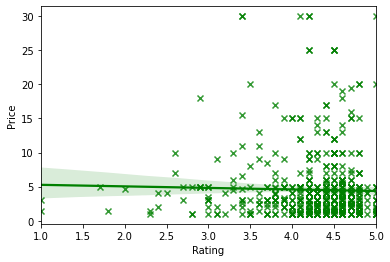

In [305]:
sns.regplot(x="Rating", y="Price", data=s, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True,dropna=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, label=None, color="Green", marker='x', scatter_kws=None, line_kws=None, ax=None)

# (e). Does the pattern change?
# (f). What is your overall inference on the effect of price on the rating?

Yes, there is a pattern and also a significant change after removing the indices at 0 level price. The 'regression line' has been shifted a bit upward that means among the paid apps in play sore and here also most of the top rated apps have lower price. As 'regression line' shows the best fitting curve and almost all apps fall below that, most of the top rated apps in play store are being under-valued and there is a scope to lift the price of the apps a bit.

# 9. Look at all the numeric interactions together :

# (a). Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'.

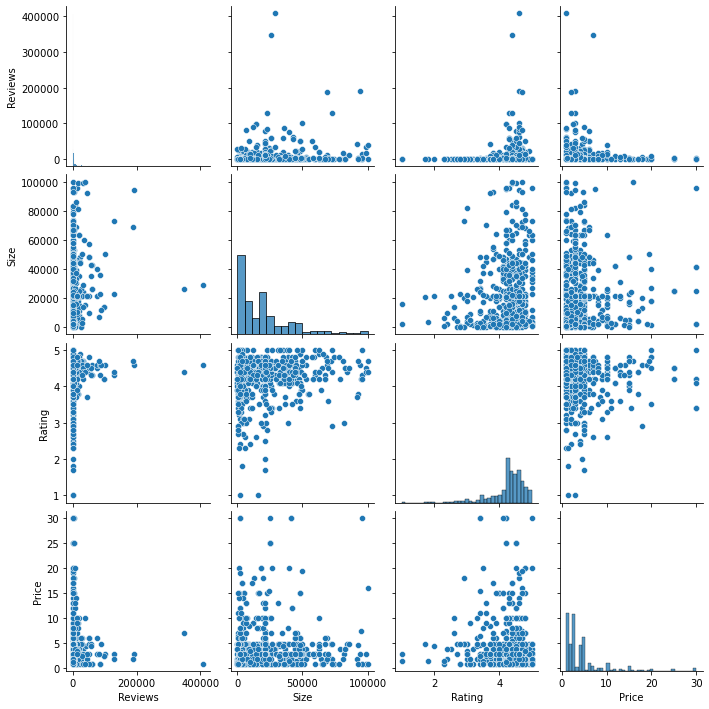

In [306]:
sns.pairplot( s, x_vars=["Reviews", "Size", "Rating","Price"], y_vars=["Reviews", "Size", "Rating","Price"])

# 10. Rating vs. content rating :

# (a). Make a bar plot displaying the rating for each content rating.

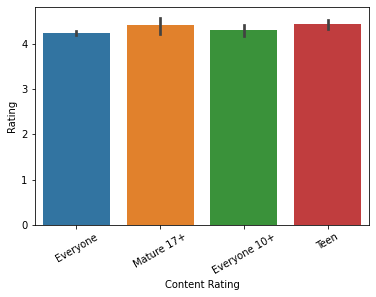

In [307]:
sns.barplot(x="Content Rating", y="Rating", data=s)
plt.xticks(rotation=30)
plt.show()

# (b). Which metric would you use? Mean? Median? Some other quantile?

In [308]:
from numpy import median
t=s.groupby(["Content Rating"]).agg({"Rating": median})
t

Rating
Content Rating        
Everyone           4.4
Everyone 10+       4.4
Mature 17+         4.5
Teen               4.5

# (c). Choose the right metric and plot.

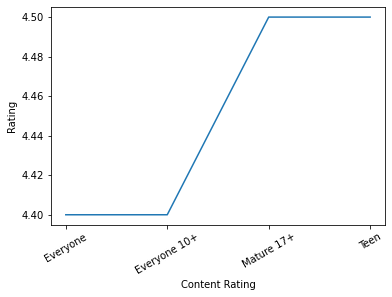

In [309]:
sns.lineplot(x="Content Rating", y="Rating", data=t)
plt.xticks(rotation=30)
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time :

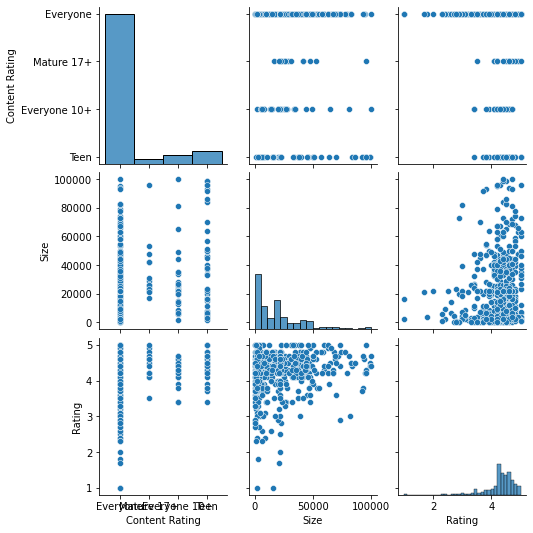

In [310]:
sns.pairplot( s, x_vars=["Content Rating", "Size", "Rating"], y_vars=["Content Rating", "Size", "Rating"])

# (a). Create 5 buckets (20% records in each) based on Size.

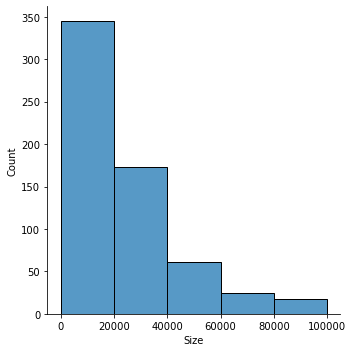

In [311]:
sns.displot(s["Size"], bins=5)
plt.show()

# (b). By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination. 

In [312]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
s['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(s, values='Rating', index='Size_Buckets', columns='Content Rating')

<ipython-input-312-ae6576e4c588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating  Everyone  Everyone 10+  Mature 17+      Teen
Size_Buckets                                                
VERY LOW        4.201597      4.323077    3.500000  4.422222
LOW             4.312857      4.284615    4.454545  4.688889
MED             4.318750      4.100000    4.425000  4.514286
HIGH            4.447619      4.500000         NaN  4.200000
VERY HIGH       4.314286      4.550000    5.000000  4.225000

In [313]:
s.Size.quantile([0.2, 0.4, 0.6, 0.8])

0.2     2900.0
0.4     8600.0
0.6    21516.0
0.8    36000.0
Name: Size, dtype: float64

In [314]:
s.Rating.quantile([0.2, 0.4, 0.6, 0.8])

0.2    4.0
0.4    4.3
0.6    4.5
0.8    4.6
Name: Rating, dtype: float64

# (c). Make a heatmap of this.

In [317]:
Size_Buckets =pd.pivot_table(s, values='Rating', index='Size_Buckets', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
Size_Buckets                                            
VERY LOW            3.90          4.14         3.5  4.24
LOW                 4.10          4.14         4.2  4.56
MED                 4.04          3.98         4.1  4.32
HIGH                4.20          4.50         NaN  4.02
VERY HIGH           4.26          4.46         5.0  3.96

# (i). Annotated :

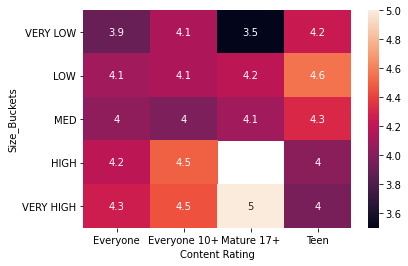

In [318]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

# (ii). Greens color map :

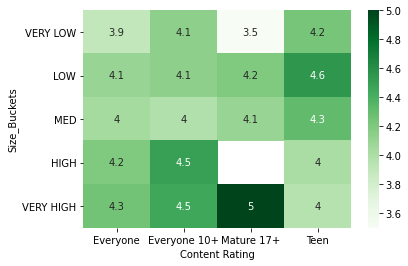

In [319]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

# (d). What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes, most of the apps in play store with bigger size seem to be more preferred in all the 'Content Rating' columns but not to a big variation in it. Except, the 'Mature 17+' values, where apps with small size aren't preferred to a greater variation.